**Malaria Diagnosis**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfdf
from tensorflow.keras.layers import MaxPool2D, Conv2D,Dense, Flatten,InputLayer, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
dataset, dataset_info = tfdf.load("malaria", with_info = True, as_supervised = True, shuffle_files =True, split =['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteJ39LY4/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
for data in dataset[0].take(4):
  print(data)
  break

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


In [4]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO =0.1

In [5]:
def split(dataset, TRAIN_RATIO, VAL_RATIO,TEST_RATIO):


  DATASET_SIZE = len(dataset)
  #print(list(dataset.as_numpy_iterator()))
  train_dataset = dataset.take((int(TRAIN_RATIO*DATASET_SIZE)))
  #print(list(train_dataset.as_numpy_iterator()))
  val_test_dataset = dataset.skip((int(TRAIN_RATIO*DATASET_SIZE)))

  val_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))
  #print(list(val_dataset.as_numpy_iterator()))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
  test_dataset = test_dataset.take(int(TEST_RATIO*DATASET_SIZE))
  #print(list(test_dataset.as_numpy_iterator()))
  return train_dataset,val_dataset, test_dataset


In [6]:
#dataset = tf.data.Dataset.range(10)
train_dataset,val_dataset, test_dataset = split(dataset[0],TRAIN_RATIO, VAL_RATIO,TEST_RATIO)
print(list(train_dataset.as_numpy_iterator()))
train_dataset


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

**Data Visualization**

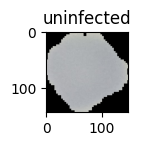

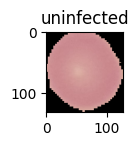

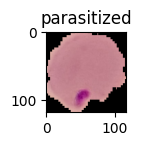

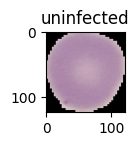

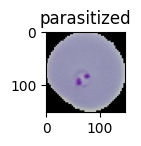

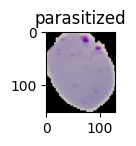

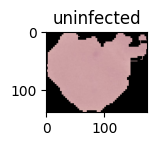

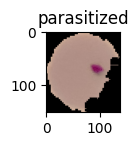

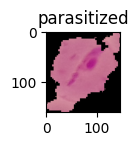

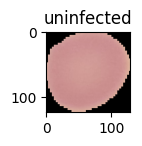

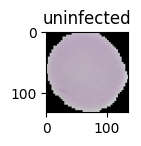

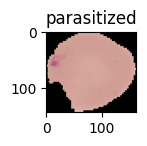

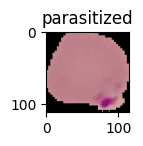

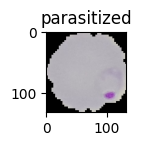

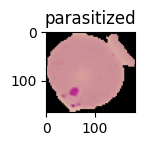

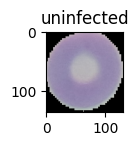

In [7]:
for i, (image,label) in enumerate(train_dataset.take(16)):
  ax= plt.subplot(4, 4, i + 1)
  ax.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.show()


**Data Preprocessing**

In [8]:
IM_SIZE = 224
# this function resize the original image into IM_SIZE
def resize_rescale(image,label):
  return(tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0, label)

In [9]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset =  val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
for image,label in enumerate(train_dataset.take(1)):
  print(image,label)

0 (<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>, <tf.Tensor: shape=(), dtype=in

In [11]:
BATCH_SIZE = 32
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [12]:
train_dataset = train_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration=True ).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration=True ).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration=True ).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

**Why and How Con**

**Model Creation and Training**

In [13]:
# Model creation
model = tf.keras.Sequential([InputLayer(input_shape=(IM_SIZE, IM_SIZE,3)),
                             Conv2D(filters =6,kernel_size=3,strides=1,padding='valid', activation = 'relu'),
                             BatchNormalization(),
                             MaxPool2D(pool_size =2, strides =2),

                             Conv2D(filters =16,kernel_size=3,strides=1,padding='valid', activation = 'relu'),
                             BatchNormalization(),
                             MaxPool2D(pool_size =2, strides =2),

                             Flatten(),
                             Dense(1000, activation = "relu"),
                             BatchNormalization(),
                             Dense(100, activation="relu"),
                             BatchNormalization(),
                             Dense(1, activation ="sigmoid")

                             ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [14]:
model.compile(loss=BinaryCrossentropy(),
              optimizer = Adam(learning_rate = 0.01),
              metrics ="accuracy"
              )

In [15]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [23]:
#training the model
history = model.fit(train_dataset, validation_data = val_dataset, epochs =20, verbose =1)

Epoch 1/20
689/689 [==============================] - 55s 80ms/step - loss: 0.1344 - accuracy: 0.9553 - val_loss: 0.2485 - val_accuracy: 0.9234
Epoch 2/20
689/689 [==============================] - 48s 69ms/step - loss: 0.1388 - accuracy: 0.9540 - val_loss: 0.3306 - val_accuracy: 0.9060
Epoch 3/20
689/689 [==============================] - 52s 76ms/step - loss: 0.1255 - accuracy: 0.9581 - val_loss: 0.4918 - val_accuracy: 0.8693
Epoch 4/20
689/689 [==============================] - 56s 81ms/step - loss: 0.1344 - accuracy: 0.9550 - val_loss: 0.4780 - val_accuracy: 0.9176
Epoch 5/20
689/689 [==============================] - 49s 71ms/step - loss: 0.1244 - accuracy: 0.9570 - val_loss: 0.1920 - val_accuracy: 0.9423
Epoch 6/20
689/689 [==============================] - 48s 69ms/step - loss: 0.1098 - accuracy: 0.9612 - val_loss: 1.5318 - val_accuracy: 0.5724
Epoch 7/20
689/689 [==============================] - 49s 71ms/step - loss: 0.0981 - accuracy: 0.9658 - val_loss: 0.3320 - val_accuracy:

**Model Evaluation**

In [22]:
model.evaluate(test_dataset)

87/87 [==============================] - 16s 36ms/step - loss: 0.2276 - accuracy: 0.9318


[0.22760255634784698, 0.9317604303359985]

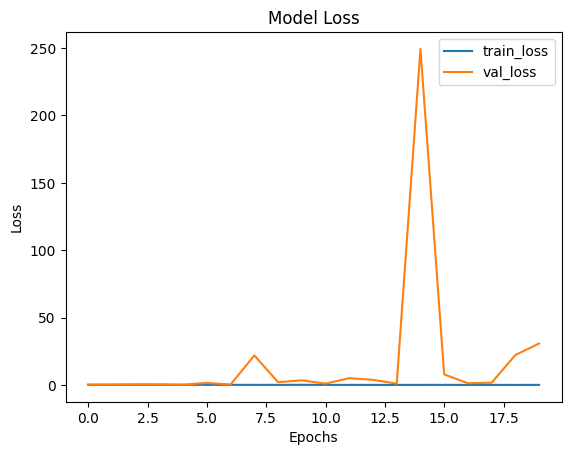

In [24]:
index = np.arange(20)
plt.plot(index,history.history['loss'],label='train_loss')
plt.plot(index, history.history['val_loss'],label = 'val_loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

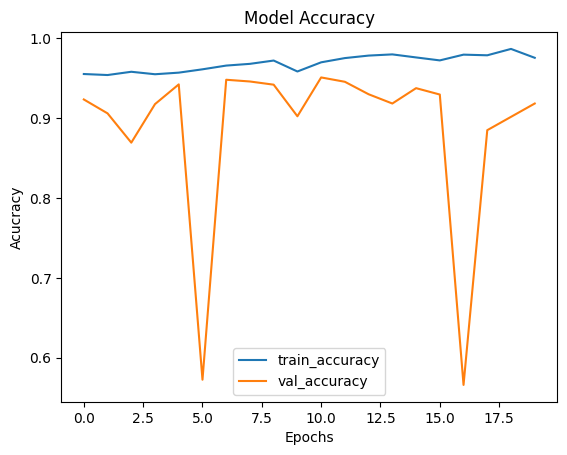

In [26]:
index = np.arange(20)
plt.plot(index,history.history['accuracy'],label='train_accuracy')
plt.plot(index, history.history['val_accuracy'],label = 'val_accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Acucracy')
plt.legend()
plt.show()

In [33]:
def parasite_or_not(x):
  if(x>0.5):
    return str("P")
  else:
    return str('U')

In [30]:
parasite_or_not(model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 14s 14s/step


'P'

1/1 [==============================] - 0s 27ms/step


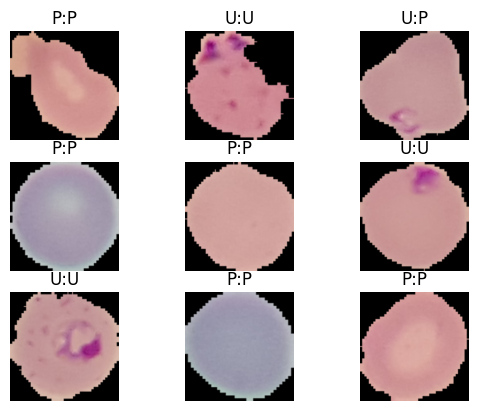

In [34]:
for i,(image,label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" +str(parasite_or_not(model.predict(image)[0][0])))
  plt.axis('off')


**This is the final output of the model.**

This model is 97% accurately classifying the disease.
